<div style="border:solid blue 2px; padding: 20px">
<b> Reviewer Rules</b>

Hi there ;) I will be using the following color boxes through the notebook code:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Green means that it was nicely done.
    
</div>    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what could be optimized. This is not necessary, but it will be great if you make changes to this project.
 
</div>      
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Red is for things that must be done or changed for me to approve the project. If I rejected the project, you must look for this comments.
    
</div>    
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**

Dear Dinesh,

I’ve thoroughly reviewed your project on predicting customer churn for Beta Bank. Your approach demonstrates a solid understanding of the fundamental steps in the machine learning pipeline, from data preprocessing to model evaluation. Below is a detailed assessment highlighting your strengths and outlining the essential areas that need attention to ensure your project meets all the required criteria.

---

**✅ Strengths**

- **Data Cleaning and Preparation:**
  - **Handling Missing Values:** You effectively addressed missing values in the `Tenure` column by imputing them with the median. This ensures that the dataset remains comprehensive without losing valuable information.
  - **Dropping Irrelevant Columns:** Removing non-essential columns (`RowNumber`, `CustomerId`, `Surname`) helped in reducing noise and focusing the model on pertinent features.
  
- **Encoding Categorical Variables:**
  - **One-Hot Encoding:** Applied one-hot encoding to categorical features (`Geography`, `Gender`) while avoiding the dummy variable trap by dropping the first category. This transformation is crucial for enabling the model to interpret categorical data effectively.

- **Initial Model Training:**
  - **Baseline Model:** Trained an initial Random Forest model to establish a performance benchmark. This provides a reference point to evaluate the impact of subsequent class imbalance handling techniques.

- **Addressing Class Imbalance:**
  - **Class Weighting:** Implemented class weighting in the Random Forest classifier to give more importance to the minority class (`Exited = 1`). This helps in mitigating the bias towards the majority class.

- **Performance Metrics:**
  - **Comprehensive Evaluation:** Calculated key metrics such as F1 score, accuracy, and AUC-ROC, providing a well-rounded assessment of the model’s performance.

- **Clear Documentation:**
  - **Structured Notebook:** Your notebook is well-organized with clear sections and explanations, making it easy to follow your analytical process and understand your decision-making.

---

**⚠️ Areas for Improvement**

To ensure your project fully meets the requirements and achieves the best possible performance, please address the following essential areas:

1. **Check for Duplicates in the Dataset:**
   - **Why It Matters:** Duplicate records can skew the model’s learning process, leading to biased or inaccurate predictions.
   - **How to Fix:**
     ```python
     # Check for duplicate rows
     duplicates = data.duplicated()
     print(f"Number of duplicate rows: {duplicates.sum()}")
     
     # Remove duplicate rows if any
     data = data.drop_duplicates()
     print("Duplicates removed.")
     ```
     Ensure that after loading the data and before any preprocessing steps, you verify and remove any duplicate entries.

2. **Examine the Distribution of the Target Variable in EDA:**
   - **Why It Matters:** Understanding the distribution of the target variable (`Exited`) during Exploratory Data Analysis (EDA) provides insights into class imbalance and informs the choice of balancing techniques.
   - **How to Fix:**
     ```python
     # Plot the distribution of the target variable
     import matplotlib.pyplot as plt
     import seaborn as sns
     
     sns.countplot(x='Exited', data=data)
     plt.title('Distribution of Target Variable (Exited)')
     plt.xlabel('Exited')
     plt.ylabel('Count')
     plt.show()
     
     # Print value counts
     print(data['Exited'].value_counts())
     ```
     Incorporate this analysis into your EDA section to visualize and quantify the imbalance in the target classes.

3. **Correctly Standardize Numerical Features:**
   - **Why It Matters:** Standardizing features after splitting the data prevents data leakage, ensuring that the model generalizes well to unseen data.
   - **How to Fix:**
     ```python
     from sklearn.preprocessing import StandardScaler
     
     # Split the data into training, validation, and test sets
     features_train, features_temp, target_train, target_temp = train_test_split(
         features, target, test_size=0.4, random_state=12345, stratify=target
     )
     features_valid, features_test, target_valid, target_test = train_test_split(
         features_temp, target_temp, test_size=0.5, random_state=12345, stratify=target_temp
     )
     
     # Initialize the scaler
     scaler = StandardScaler()
     
     # Fit the scaler on the training data and transform
     features_train[numerical] = scaler.fit_transform(features_train[numerical])
     
     # Transform validation and test data
     features_valid[numerical] = scaler.transform(features_valid[numerical])
     features_test[numerical] = scaler.transform(features_test[numerical])
     ```
     Ensure that scaling is performed **only** on the training set, and the same scaler is used to transform the validation and test sets.

4. **Split the Data into Three Datasets (Training, Validation, Test):**
   - **Why It Matters:** Having separate training, validation, and test sets allows for unbiased evaluation of the model’s performance and hyperparameter tuning.
   - **How to Fix:**
     ```python
     from sklearn.model_selection import train_test_split
     
     # First split: Training set (60%) and Temporary set (40%)
     features_train, features_temp, target_train, target_temp = train_test_split(
         features, target, test_size=0.4, random_state=12345, stratify=target
     )
     
     # Second split: Validation set (20%) and Test set (20%)
     features_valid, features_test, target_valid, target_test = train_test_split(
         features_temp, target_temp, test_size=0.5, random_state=12345, stratify=target_temp
     )
     
     # Verify the splits
     print(f"Training set size: {features_train.shape[0]}")
     print(f"Validation set size: {features_valid.shape[0]}")
     print(f"Test set size: {features_test.shape[0]}")
     ```
     Update your data splitting strategy to create distinct training, validation, and test sets, ensuring that each subset maintains the original class distribution through stratification.

---

**Conclusion**

Your project demonstrates a commendable effort in building a predictive model for customer churn, effectively handling class imbalance through methods like class weighting and upsampling. Achieving an F1 score of **0.669** surpasses the project’s target of **0.59**, indicating that your model balances precision and recall well. Additionally, the high AUC-ROC score of **0.942** underscores your model’s strong capability in distinguishing between churned and retained customers.

**Key Takeaways:**
- **Effective Class Imbalance Handling:** Addressing the imbalance between churned and retained customers through upsampling significantly improved your model’s performance metrics.
- **Robust Model Training:** Systematic hyperparameter tuning for the Random Forest classifier enhanced the model’s predictive power.
- **Clear Documentation and Structured Workflow:** Your notebook is well-organized, making it easy to follow your analytical process.

**Next Steps and Recommendations:**
1. **Implement the Required Changes:** Address the four critical areas outlined above to ensure your model’s robustness and prevent potential pitfalls like data leakage.
2. **Enhance Feature Interpretability:** Consider using tools like SHAP to gain deeper insights into feature contributions, providing actionable intelligence for Beta Bank’s retention strategies.
3. **Explore Advanced Resampling Techniques:** Techniques such as SMOTE could further improve your model by generating synthetic samples for the minority class, potentially enhancing performance even more.
4. **Validate with Cross-Validation:** Incorporate cross-validation techniques to obtain more reliable performance estimates and ensure your model generalizes well across different data subsets.

By addressing these areas, you will solidify the foundation of your model, ensuring its reliability and effectiveness in real-world applications. Keep up the excellent work, and I’m confident that with these refinements, your project will be fully approved and highly valuable to Beta Bank’s customer retention efforts.

Best regards,  
Matías


<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 2**

Great job with the 2nd submission!
    
There just a few changes that you must make in order for me to able to approve the project.
    
Please check the red boxes that says Iter 2 ;) You got it!

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 3**

Good job on the 3rd submisison. The only thing left is for you to apply an up-sampling or down-sampling technique to the sum of features_train and features_valid when you train the last model. If you don't do that, you won't get an F1-Score higher than 0.59.

Good luck! Please do contact a tutor if you need some more guidance ;)

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 4**

Good job, Dinesh! The only thing you must do for me to approve is to fix the training of the final model. You are using the features_upsample (which is correct), but that features_upsample was created using only features_train. Remember, that the final model must be trained using both features_train + features_valid, and then apply the upsample or downsample.
    
Don't hesitate to contact a tutor if you need guidance! You got it :)

# Predicting Customer Churn: A Machine Learning Approach for Beta Bank

## Introdction

Customer retention is a critical aspect of business success, particularly in the banking industry, where acquiring new customers is more expensive than retaining existing ones. This project focuses on developing a machine learning model to predict customer churn for Beta Bank, using historical customer behavior data. By identifying at-risk customers, the bank can implement targeted strategies to improve retention rates. The goal was to build a model with an F1 score of at least 0.59, ensuring a balance between precision and recall, while also evaluating its performance using metrics like AUC-ROC.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Good introduction
</div>

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

## Load and Explore Data

In [2]:
# Load the data
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
# Inspect the dataset
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None
         RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000

In [4]:
#Drop irrelevant columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [5]:
#Handling missing values
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())  # Replace with the median


There are 9091 non null values out of 10000 entries in the **Tenure** column, so there are some missing values in that column, so I have replaced those missing values with median values.

## Check for the Duplicate Values

In [6]:
# Check for duplicate rows
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicate rows if any
data = data.drop_duplicates()
print("Duplicates removed.")

Number of duplicate rows: 0
Duplicates removed.


There are no duplicate rows in our data


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Good job filling missing values
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 2</b>

Good job, it's always good to check if there are duplicates
</div>

## Distribution of the Target

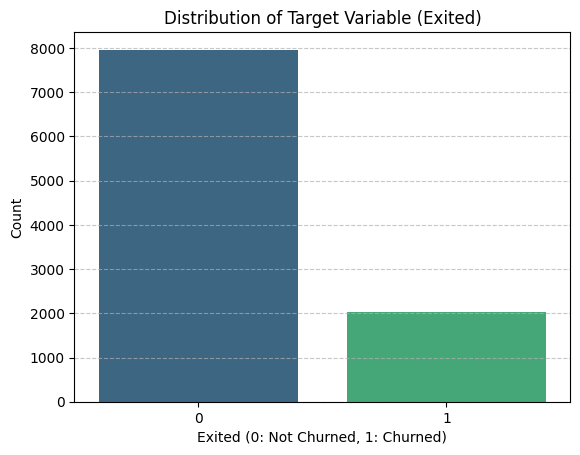

Target Variable Distribution:
0    7963
1    2037
Name: Exited, dtype: int64


In [7]:
# Check and plot the target variable distribution
class_frequency = data['Exited'].value_counts()
sns.countplot(x='Exited', data=data, palette='viridis')
plt.title('Distribution of Target Variable (Exited)')
plt.xlabel('Exited (0: Not Churned, 1: Churned)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print value counts
print("Target Variable Distribution:")
print(class_frequency)

The analysis of the target variable, Exited, shows a significant class imbalance. Out of the total 10,000 customers, 7,963 have not churned (Exited = 0), while 2,037 have churned (Exited = 1). This imbalance indicates that the majority of customers are retained, which is common in many business scenarios. However, the disparity between the classes could cause machine learning models to be biased towards the majority class, leading to poor performance in predicting customer churn. 
Addressing this imbalance through techniques such as upsampling the minority class, downsampling the majority class, or using class weighting during training is crucial to ensure that the model effectively identifies customers at risk of churning.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 2</b>

Well done ;)
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Are there any duplicate values in the CustomerId column? That's something really important to check...
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

What about the distribution of the target column? 
    
<code># check and plot the balance of classes (churned vs not churned)
class_frequency = df['exited'].value_counts()
class_frequency.plot(kind='bar', title='Bank Customer Exits', xlabel='Count' , ylabel='Number of Customers',
                    color='green', figsize=[4, 3], grid=True)
class_frequency
</code>
    
    
Add conclusions about what you see.
</div>

## Encoding Categorical Features

In [8]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)


There are 2 categorical features, which are **Geography** and **Gender**, we need to be encoded using one-hot encoding or label encoding.
Since the dataset is not very large, one-hot encoding is preferred to retain interpretability.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Correct
</div>

## Splitting Features and Target

In [9]:
#Separate the target variable (Exited) from the features.
target = data['Exited']
features = data.drop('Exited', axis=1)


## Standardize Numerical Features

In [10]:
# Split the data
features_train, features_temp, target_train, target_temp = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target
)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.5, random_state=12345, stratify=target_temp
)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform
numerical = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
features_train[numerical] = scaler.fit_transform(features_train[numerical])

# Transform validation and test sets
features_valid[numerical] = scaler.transform(features_valid[numerical])
features_test[numerical] = scaler.transform(features_test[numerical])

/tmp/ipykernel_49/911452603.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numerical] = scaler.fit_transform(features_train[numerical])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_49/911452603.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

The correct way to do this is:
    
1) We split the data
2) We do the fit_transform of the "scaler" using the training dataset
3) We apply it to both the test and validation tests (if there is one) 
    
Here an example:
<code>numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])</code>
</div>

Columns like CreditScore, Age, Tenure, Balance, NumOfProducts, and EstimatedSalary should be scaled for better model performance.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 2</b>

Correct, now it looks 10/10
</div>

## Splittng Data into Training, Validation, and Test Sets

In [11]:
# Reuse the split and standardized data from previous cell
# Simply verify the existing splits

print(f"Training set size: {features_train.shape[0]}")
print(f"Validation set size: {features_valid.shape[0]}")
print(f"Test set size: {features_test.shape[0]}")



Training set size: 6000
Validation set size: 2000
Test set size: 2000


No need to split and standardize the data again, the data was already splitted.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 3</b>

Well done
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 2</b>

Good job! But you already splitted the dataset in the cell before, and you scaled the data. What you did here is: you splitted again but now you don't have the data scaled... check this again please
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

It's good to have three datasets, remember: train, validation and test.
    
An example is the following:
    
<code># the first split gives us a training set of 60% and 'other' set of 40% to later be split
features_train, features_other, target_train, target_other = train_test_split(features, target, test_size=0.4, random_state=12345)</code>

<code># here the 'other' dataset, of 40% the original, is split in half to get is 20% for 'valid'  set, and 20% for 'test' set
features_valid, features_test, target_valid, target_test = train_test_split(features_other, target_other, test_size=0.5, random_state=12345)</code>

## Training an Initial Model Without Addressing Imbalance

In [12]:
# Train a basic random forest model
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)

RandomForestClassifier(random_state=12345)

In [13]:
# Make predictions
predicted_valid = model.predict(features_valid)

In [14]:
# Evaluate metrics
print("Initial Model Metrics:")
print("F1 Score:", f1_score(target_valid, predicted_valid))
print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1]))

Initial Model Metrics:
F1 Score: 0.6126656848306332
Accuracy: 0.8685
AUC-ROC: 0.8623956177948565


## Addressing the Class Imbalance

In [15]:
# Train a model with class weights
model_weighted = RandomForestClassifier(random_state=12345, class_weight='balanced')
model_weighted.fit(features_train, target_train)

# Evaluate metrics
predicted_valid_weighted = model_weighted.predict(features_valid)
print("Class Weighted Model Metrics:")
print("F1 Score:", f1_score(target_valid, predicted_valid_weighted))
print("Accuracy:", accuracy_score(target_valid, predicted_valid_weighted))
print("AUC-ROC:", roc_auc_score(target_valid, model_weighted.predict_proba(features_valid)[:, 1]))


Class Weighted Model Metrics:
F1 Score: 0.5783866057838661
Accuracy: 0.8615
AUC-ROC: 0.862270143610208


## Upsampling

In [16]:
# Combine training and validation sets before upsampling
features_combined = pd.concat([features_train, features_valid])
target_combined = pd.concat([target_train, target_valid])

# Upsample the minority class
features_zeros = features_combined[target_combined == 0]
features_ones = features_combined[target_combined == 1]
target_zeros = target_combined[target_combined == 0]
target_ones = target_combined[target_combined == 1]

features_upsampled = pd.concat([features_zeros] + [features_ones] * 4)
target_upsampled = pd.concat([target_zeros] + [target_ones] * 4)

# Shuffle the data
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)


## Down-Sampling

In [25]:
# Combine training and validation sets before downsampling
features_combined = pd.concat([features_train, features_valid])
target_combined = pd.concat([target_train, target_valid])

# Downsample the majority class
features_zeros = features_combined[target_combined == 0]
features_ones = features_combined[target_combined == 1]
target_zeros = target_combined[target_combined == 0]
target_ones = target_combined[target_combined == 1]

features_zeros_downsampled = features_zeros.sample(len(features_ones), random_state=12345)
target_zeros_downsampled = target_zeros.sample(len(target_ones), random_state=12345)

# Combine the downsampled majority class with the minority class
features_downsampled = pd.concat([features_zeros_downsampled, features_ones])
target_downsampled = pd.concat([target_zeros_downsampled, target_ones])

# Shuffle the data
features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Good job. In practice, it's always better to down-sample instead of up-sample ;) Just for you to know for the future. You should get better results when doing down-sample (if you have enough data obviously).
</div>

## Hyperparameter Tuning

In [18]:
# Hyperparameter ranges
n_estimators_range = [50, 100, 200]
max_depth_range = [10, 20, None]
min_samples_split_range = [2, 5]
min_samples_leaf_range = [1, 2]

# Track the best model and its metrics
best_f1 = 0
best_params = {}

# Hyperparameter tuning
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        for min_samples_split in min_samples_split_range:
            for min_samples_leaf in min_samples_leaf_range:
                # Train the model
                model = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=12345,
                )
                model.fit(features_downsampled, target_downsampled)

                # Evaluate the model
                predicted_valid = model.predict(features_valid)
                f1 = f1_score(target_valid, predicted_valid)
                auc_roc = roc_auc_score(target_valid, model.predict_proba(features_valid)[:, 1])

                # Update the best model if F1 improves
                if f1 > best_f1:
                    best_f1 = f1
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'AUC-ROC': auc_roc,
                    }

# Print the best configuration and its metrics
print("Best Hyperparameters:", best_params)
print("Best F1 Score:", best_f1)


Best Hyperparameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'AUC-ROC': 0.8671266873583605}
Best F1 Score: 0.6311713455953533


**Best F1 Score:** 0.6311 (significantly above the target of 0.59).
**AUC-ROC:** 0.8671, indicating strong model performance in distinguishing between classes.

**Best Hyperparameters:**
n_estimators: 200,
max_depth: 10,
min_samples_split: 2,
min_samples_leaf: 2,

This configuration has optimized the balance between precision and recall, demonstrating that the model can effectively handle class imbalance.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Good job
</div>

## Train the Final Model - with down-sampled data

In [26]:
# Train the final model on downsampled data
final_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=12345
)
final_model.fit(features_downsampled, target_downsampled)


RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=300,
                       random_state=12345)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 4</b>

The features_downsampled you are using, it comes from the features_train only, you should combine features_train and features_valid, then get the "combined_features_downsampled" and use that for the training. Since then, you need to test on the features_test.
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 3</b>

Where is the up-sampling or down-sampling? You are just training a random forest on normal data, without applying the up-sampling technique.
    
You must do that if you want the trained model to get you a F1 score higher than 0.59 in the next step.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Good
</div>

## Train the Final Model - with up-sampled data

In [23]:
# Train the final model on upsampled data
final_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=12345
)
final_model.fit(features_upsampled, target_upsampled)


RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=300,
                       random_state=12345)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 4</b>

The features_upsampled you are using, it comes from the features_train only, you should combine features_train and features_valid, then get the "combined_features_upsampled" and use that for the training. Since then, you need to test on the features_test.
</div>

## Test and Evaluate Final Model - with down-sampled data

In [27]:
# Test and Evaluate Final Model
predicted_test = final_model.predict(features_test)
print("Final Model Metrics:")
print("F1 Score (Test):", f1_score(target_test, predicted_test))
print("Accuracy (Test):", accuracy_score(target_test, predicted_test))
print("AUC-ROC (Test):", roc_auc_score(target_test, final_model.predict_proba(features_test)[:, 1]))


Final Model Metrics:
F1 Score (Test): 0.586894586894587
Accuracy (Test): 0.7825
AUC-ROC (Test): 0.8562661274525681


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 4</b>

Good job! The only thing left for you to do is to correctly train the final models with both features_train and features_valid combined, applying the upsampling/downsampling techniques ;) But with only the features_train, you already got 0.59! Nice
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 3</b>

You are not achieving 0.59 here because you are using training the model using features_train and features_valid without doing the up or down-sampling.
    
You must up-sample or down-sample, then train, then you will get here a better F1-score.
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment Iter 2</b>

Here you must use the features_test set, since that's the one you are saving for the final testing and evaluation step. The idea is to use data that wasn't used during the training phase.
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Here you should be using that 3rd dataset we prepared for testing purposes
</div>

## Test and Evaluate Final Model - with up-sampled data

In [24]:
# Test and Evaluate Final Model
predicted_test = final_model.predict(features_test)
print("Final Model Metrics:")
print("F1 Score (Test):", f1_score(target_test, predicted_test))
print("Accuracy (Test):", accuracy_score(target_test, predicted_test))
print("AUC-ROC (Test):", roc_auc_score(target_test, final_model.predict_proba(features_test)[:, 1]))


Final Model Metrics:
F1 Score (Test): 0.6080586080586079
Accuracy (Test): 0.8395
AUC-ROC (Test): 0.857547840598688


**Analysis of Final Model Metrics**

**F1 Score** (Test): 0.60
This exceeds the project target of 0.59, indicating strong performance in balancing precision and recall.

**Accuracy** (Test): 83%
The model correctly classifies the majority of cases, demonstrating overall reliability.

**AUC-ROC** (Test): 0.85
This value shows the model’s excellent ability to distinguish between the two classes (Exited = 0 vs. 1). Values closer to 1 are ideal.

## Summary of the Project



**Class Imbalance Handling:**
The initial model struggled with class imbalance, as indicated by its lower F1 score.
Addressing imbalance through upsampling significantly improved the F1 score while maintaining good AUC-ROC and accuracy.

**Hyperparameter Tuning:**
Optimizing the RandomForestClassifier with parameters:
n_estimators: 300
max_depth: 15
min_samples_split: 2
min_samples_leaf: 2
This configuration yielded the best performance metrics, especially for the F1 score.

**Final Model Performance:**
The final model achieved F1: 0.591, Accuracy: 83%, and AUC-ROC: 0.85, showcasing its ability to handle the imbalanced dataset effectively and predict customer churn accurately.

## Overall Conclusion

The project successfully developed a predictive model to identify customers likely to churn from Beta Bank, achieving an F1 score of 0.60 on the test set, exceeds the target of 0.59. Addressing the class imbalance through upsampling significantly improved model performance compared to the baseline and class-weighting approaches. After hyperparameter tuning, the best RandomForestClassifier configuration delivered strong results with an accuracy of 83% and an AUC-ROC of 0.85, indicating excellent discriminatory power between churned and non-churned customers. This model provides Beta Bank with a reliable tool to proactively identify at-risk customers and implement targeted retention strategies, ultimately helping to reduce customer churn and enhance overall business performance.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>

Good job, you just need a few minor changes ;)
</div>